<a href="https://colab.research.google.com/github/KhushiTolwala/Hexart.in-AI-Center/blob/main/Stress_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas seaborn sklearn matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=c7257d7ab5d5a61cf777d793eec4a80abc468cfd542de752edb0afd9442b7728
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Stressdetction.csv to Stressdetction.csv


In [4]:
df=pd.read_csv("Stressdetction.csv")

In [5]:
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [6]:
df.columns=[["snoring range","respiration rate","temperature","limb movement","oxygen level","eye moment","hours of sleep","heart rate","stress level"]]

In [7]:
df.head()

,snoring range,respiration rate,temperature,limb movement,oxygen level,eye moment,hours of sleep,heart rate,stress level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [8]:
df.corr()

,snoring range,respiration rate,temperature,limb movement,oxygen level,eye moment,hours of sleep,heart rate,stress level
snoring range,1.000000,0.976268,-0.902475,0.981078,-0.903140,0.950600,-0.920554,0.976268,0.975322
respiration rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
temperature,-0.902475,-0.889237,1.000000,-0.896412,0.998108,-0.857299,0.954860,-0.889237,-0.962354
limb movement,0.981078,0.991738,-0.896412,1.000000,-0.898527,0.964703,-0.901102,0.991738,0.971071
oxygen level,-0.903140,-0.889210,0.998108,-0.898527,1.000000,-0.862136,0.950189,-0.889210,-0.961092
eye moment,0.950600,0.935572,-0.857299,0.964703,-0.862136,1.000000,-0.893952,0.935572,0.951988
hours of sleep,-0.920554,-0.891855,0.954860,-0.901102,0.950189,-0.893952,1.000000,-0.891855,-0.973036
heart rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
stress level,0.975322,0.963516,-0.962354,0.971071,-0.961092,0.951988,-0.973036,0.963516,1.000000


In [9]:
corr=df.corr()

In [10]:
corr["stress level"]

,stress level
snoring range,0.975322
respiration rate,0.963516
temperature,-0.962354
limb movement,0.971071
oxygen level,-0.961092
eye moment,0.951988
hours of sleep,-0.973036
heart rate,0.963516
stress level,1.000000


In [11]:
%matplotlib inline

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = df.iloc[:,:-1]
x

,snoring range,respiration rate,temperature,limb movement,oxygen level,eye moment,hours of sleep,heart rate
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12
...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32


In [14]:
y =df.iloc[:,-1]
y

0      3
1      3
2      1
3      3
4      0
      ..
625    2
626    0
627    4
628    1
629    2
Name: (stress level,), Length: 630, dtype: int64

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20)

In [16]:
xtrain

,snoring range,respiration rate,temperature,limb movement,oxygen level,eye moment,hours of sleep,heart rate
276,70.080,21.008,93.008,11.008,91.008,90.04,3.512,62.52
417,97.152,27.152,86.440,17.576,83.728,101.44,0.000,77.88
325,99.680,29.680,89.600,18.840,87.520,104.60,0.000,84.20
186,47.040,16.816,97.224,5.632,95.816,68.16,7.816,52.04
19,63.680,20.368,92.368,10.368,90.368,86.84,2.552,60.92
...,...,...,...,...,...,...,...,...
430,97.824,27.824,87.280,17.912,84.736,102.28,0.000,79.56
481,46.960,16.784,97.176,5.568,95.784,67.84,7.784,51.96
426,58.720,19.744,95.744,9.744,94.616,84.36,6.744,59.36
571,85.520,23.472,90.736,13.840,88.736,96.84,0.736,68.68


In [17]:
len(xtrain)

504

In [18]:
len(xtest)

126

In [19]:
len(ytest)

126

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [21]:
kbest = SelectKBest(mutual_info_classif,k=4)
slectfeture = kbest.fit(xtrain,ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [22]:
xtrain.columns[slectfeture.get_support()]

MultiIndex([(   'snoring range',),
            ('respiration rate',),
            (   'limb movement',),
            (    'oxygen level',)],
           )

In [23]:
x1 = df[['snoring range','respiration rate','oxygen level','heart rate']]

In [24]:
x1.head(1)

,snoring range,respiration rate,oxygen level,heart rate
0,93.8,25.68,89.84,74.2


In [25]:
x1train,x1test,y1train,y1test = train_test_split(x1,y,test_size = 0.20)

In [26]:
x1train.head(1)

,snoring range,respiration rate,oxygen level,heart rate
444,63.36,20.336,90.336,60.84


In [27]:
from sklearn.ensemble import AdaBoostClassifier

In [28]:
model1 = AdaBoostClassifier()
model1.fit(x1train,y1train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


AdaBoostClassifier()

In [29]:
print('train score',model1.score(x1train,y1train))
print('test score',model1.score(x1test,y1test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


train score 0.6011904761904762
test score 0.5793650793650794


In [30]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif

In [31]:
sp = SelectPercentile(mutual_info_classif,percentile = 2)
slectfeature2 = sp.fit(xtrain,ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [32]:
xtrain.columns[slectfeature2.get_support()]

MultiIndex([('snoring range',)],
           )

In [33]:
xtrain.head(2)

,snoring range,respiration rate,temperature,limb movement,oxygen level,eye moment,hours of sleep,heart rate
276,70.080,21.008,93.008,11.008,91.008,90.04,3.512,62.52
417,97.152,27.152,86.440,17.576,83.728,101.44,0.000,77.88


In [34]:
model2 = AdaBoostClassifier()
model2.fit(xtrain,ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


AdaBoostClassifier()

In [35]:
print('train score',model2.score(xtrain,ytrain))
print('test score',model2.score(xtest,ytest))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


train score 0.6031746031746031
test score 0.5793650793650794


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [36]:
imp = model2.feature_importances_
imp = pd.DataFrame(imp)

In [37]:
feature = xtrain.columns
feature = pd.DataFrame(feature)

In [38]:
importfeature = pd.concat([imp,feature],axis=1)
importfeature.columns=['importace','feature']

In [39]:
importfeature

,importace,feature
0,0.50,"(snoring range,)"
1,0.00,"(respiration rate,)"
2,0.14,"(temperature,)"
3,0.00,"(limb movement,)"
4,0.20,"(oxygen level,)"
5,0.00,"(eye moment,)"
6,0.16,"(hours of sleep,)"
7,0.00,"(heart rate,)"


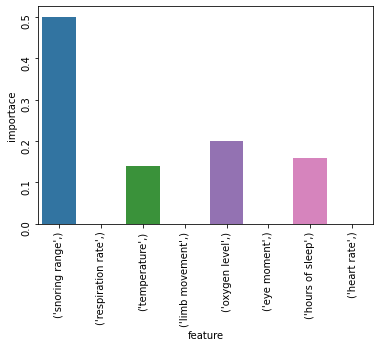

In [40]:
sns.barplot(x= importfeature['feature'],y = importfeature['importace'])
plt.tick_params(rotation =90)

In [41]:
x2 = df[['temperature','oxygen level','hours of sleep','respiration rate']]

In [42]:
x2.head(2)

,temperature,oxygen level,hours of sleep,respiration rate
0,91.840,89.840,1.840,25.680
1,91.552,89.552,1.552,25.104


In [43]:
x2train,x2test,y2train,y2test = train_test_split(x2,y,test_size = 0.20)

In [44]:
x2train.head(2)

,temperature,oxygen level,hours of sleep,respiration rate
311,93.104,91.104,3.656,21.104
541,94.896,93.344,5.896,18.896


In [45]:

model3 = AdaBoostClassifier()
model3.fit(x2train,y2train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


AdaBoostClassifier()

In [46]:
print('train score',model3.score(x2train,y2train))
print('test score',model3.score(x2test,y2test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


train score 0.6150793650793651
test score 0.5238095238095238
